In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('FiftyStartups.csv')

In [7]:
df

,State,R&D Spend,Administration Spend,Marketing Spend,Profit
0,Karnataka,165349.20,136897.80,471784.10,192261.83
1,Gujarat,162597.70,151377.59,443898.53,191792.06
2,Maharshtra,153441.51,101145.55,407934.54,191050.39
3,Karnataka,144372.41,118671.85,383199.62,182901.99
4,Maharshtra,142107.34,91391.77,366168.42,166187.94
5,Karnataka,131876.90,99814.71,362861.36,156991.12
6,Gujarat,134615.46,147198.87,127716.82,156122.51
7,Maharshtra,130298.13,145530.06,323876.68,155752.60
8,Karnataka,120542.52,148718.95,311613.29,152211.77
9,Gujarat,123334.88,108679.17,304981.62,149759.96


In [8]:
df = df.drop('State',axis=1)

In [9]:
df

,R&D Spend,Administration Spend,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
df.columns

Index(['R&D Spend', 'Administration Spend', 'Marketing Spend', 'Profit'], dtype='object')

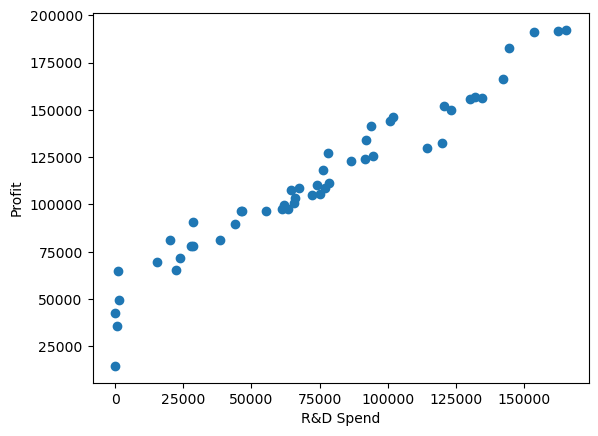

In [11]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

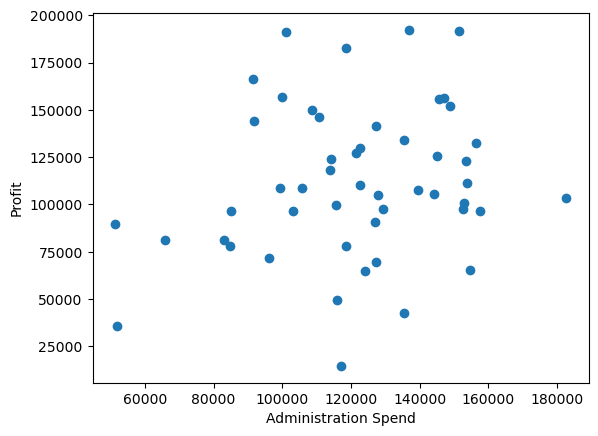

In [12]:
plt.scatter(df['Administration Spend'],df['Profit'])
plt.xlabel("Administration Spend")
plt.ylabel("Profit")
plt.show()

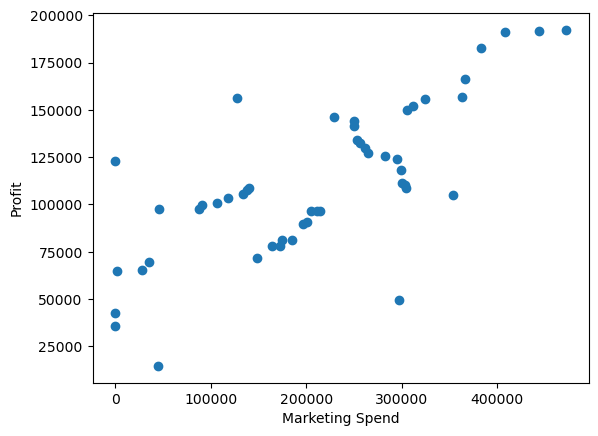

In [13]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

In [14]:
relevant_cols = ["Administration Spend", "Marketing Spend",
                 "Profit"]

In [15]:
startup_df = df[relevant_cols]
startup_df

,Administration Spend,Marketing Spend,Profit
0,136897.80,471784.10,192261.83
1,151377.59,443898.53,191792.06
2,101145.55,407934.54,191050.39
3,118671.85,383199.62,182901.99
4,91391.77,366168.42,166187.94
5,99814.71,362861.36,156991.12
6,147198.87,127716.82,156122.51
7,145530.06,323876.68,155752.60
8,148718.95,311613.29,152211.77
9,108679.17,304981.62,149759.96


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(startup_df)
scaled_data = scaler.transform(startup_df)
scaled_data

array([[ 5.60752915e-01,  2.15394309e+00,  2.01120333e+00],
       [ 1.08280658e+00,  1.92360040e+00,  1.99942997e+00],
       [-7.28257028e-01,  1.62652767e+00,  1.98084225e+00],
       [-9.63646307e-02,  1.42221024e+00,  1.77662724e+00],
       [-1.07991935e+00,  1.28152771e+00,  1.35774012e+00],
       [-7.76239071e-01,  1.25421046e+00,  1.12724963e+00],
       [ 9.32147208e-01, -6.88149930e-01,  1.10548055e+00],
       [ 8.71980011e-01,  9.32185978e-01,  1.09620987e+00],
       [ 9.86952101e-01,  8.30886909e-01,  1.00746967e+00],
       [-4.56640246e-01,  7.76107440e-01,  9.46022467e-01],
       [-3.87599089e-01,  1.49807267e-01,  8.54846746e-01],
       [-1.06553960e+00,  3.19833623e-01,  8.08167561e-01],
       [ 2.15449064e-01,  3.20617441e-01,  7.41154844e-01],
       [ 5.10178953e-01,  3.43956788e-01,  5.58749518e-01],
       [ 1.26919939e+00,  3.75742273e-01,  5.16026367e-01],
       [ 4.58678535e-02,  4.19218702e-01,  4.48719672e-01],
       [ 9.11841968e-03,  4.40446224e-01

In [17]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [18]:
clusters_centers, k_values = find_best_clusters(scaled_data, 5)

In [19]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

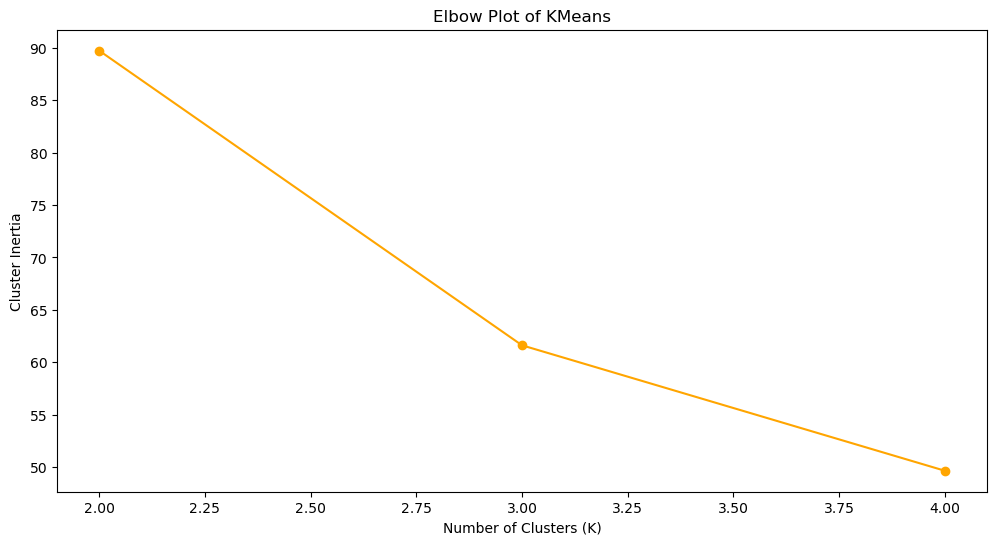

In [20]:
generate_elbow_plot(clusters_centers, k_values)

In [21]:
kmeans_model = KMeans(n_clusters = 3)

In [22]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=3)

In [23]:
df["clusters"] = kmeans_model.labels_

In [24]:
df.head()

,R&D Spend,Administration Spend,Marketing Spend,Profit,clusters
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,1


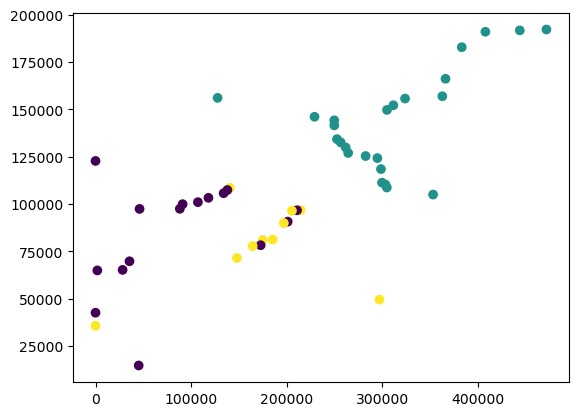

In [25]:
plt.scatter(df["Marketing Spend"],
            df["Profit"],
            c = df["clusters"]
            )

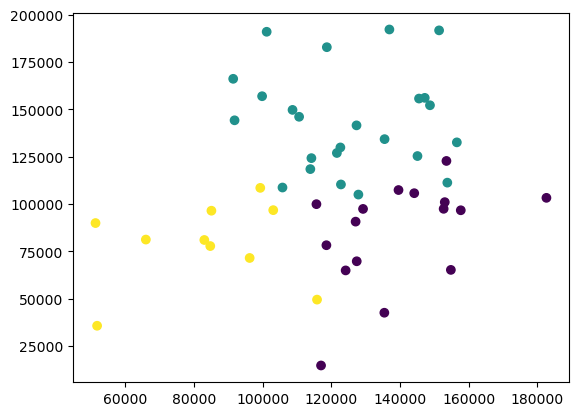

In [26]:
plt.scatter(df["Administration Spend"],
            df["Profit"],
            c = df["clusters"]
            )